# 모듈 가져오기 (IMPORT 단계)

In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro

#ARIMA
from statsmodels.tsa.arima_model import ARIMA



#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#데이터 scaling => 거리기반 알고리즘은 필수!!!
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

## PROCESS

In [2]:
# 데이터 구성하기(MFG_MACHINE)
MFG_MACHINE = pd.read_csv("/Users/joylee/Documents/BUS.csv", engine="python")
#MFG_MACHINE = MFG_MACHINE.drop(MFG_MACHINE.columns[0], axis=1)
MFG_MACHINE.head()

,JUDGE,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,...,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03
0,양품,44.3,102.3,88.8,114.8,229.5,156.5,58.9,93.2,96.0,...,30.753,34.305,2.030,2.052,567.0,583.0,599.0,572.0,538.0,519.0
1,양품,44.6,101.6,88.7,114.3,216.9,155.9,59.0,93.9,96.0,...,30.800,35.300,2.032,2.010,569.0,584.0,600.0,574.0,541.0,520.0
2,양품,45.0,114.3,90.3,115.0,217.4,140.6,58.7,94.0,95.7,...,30.694,33.015,2.033,2.061,573.0,584.0,600.0,575.0,536.0,519.0
3,양품,44.0,115.0,88.6,115.4,242.5,152.4,58.8,94.0,97.0,...,30.691,32.760,2.030,2.062,561.0,578.0,594.0,574.0,539.0,519.0
4,양품,44.8,109.6,89.2,114.5,218.3,151.8,57.3,94.0,95.5,...,31.032,33.867,2.032,2.060,562.0,578.0,593.0,572.0,537.0,518.0


In [3]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/Users/joylee/Documents/유전체.csv", engine="python")
#MFG_PROCESS = MFG_PROCESS.drop(MFG_PROCESS.columns[0], axis=1)

In [4]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/Users/joylee/Documents/형광체.csv", engine="python")
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)

### BUS

In [5]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_MACHINE.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_MACHINE["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [6]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 33)
train data Y size:(2800,)
test data X size:(1200, 33)
test data Y size:(1200,)


In [7]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.975
Score on test set: 0.965
Confusion matrix: 
[[1075    4]
 [  38   83]]


In [9]:
# cross_val_score(gb_final, df_test_x, df_test_y)

In [10]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
15,AG_RTD_TEMP_GLASS_OUT,0.529
23,BUS_DEVELOP_TEMP_TANK2,0.205
18,AG_EXPOSURE_TEMP_MASK,0.036
26,BUS_DEVELOP_PRES3,0.030
24,BUS_DEVELOP_TEMP_TANK3,0.030
8,BLACK_RTD_TEMP_HOOD_MAX,0.022
22,BUS_DEVELOP_TEMP_TANK1,0.020
5,BLACK_RTD_PRES_END,0.019
11,AG_RTD_TEMP_WALL_START,0.013
4,BLACK_RTD_PRES_START,0.012


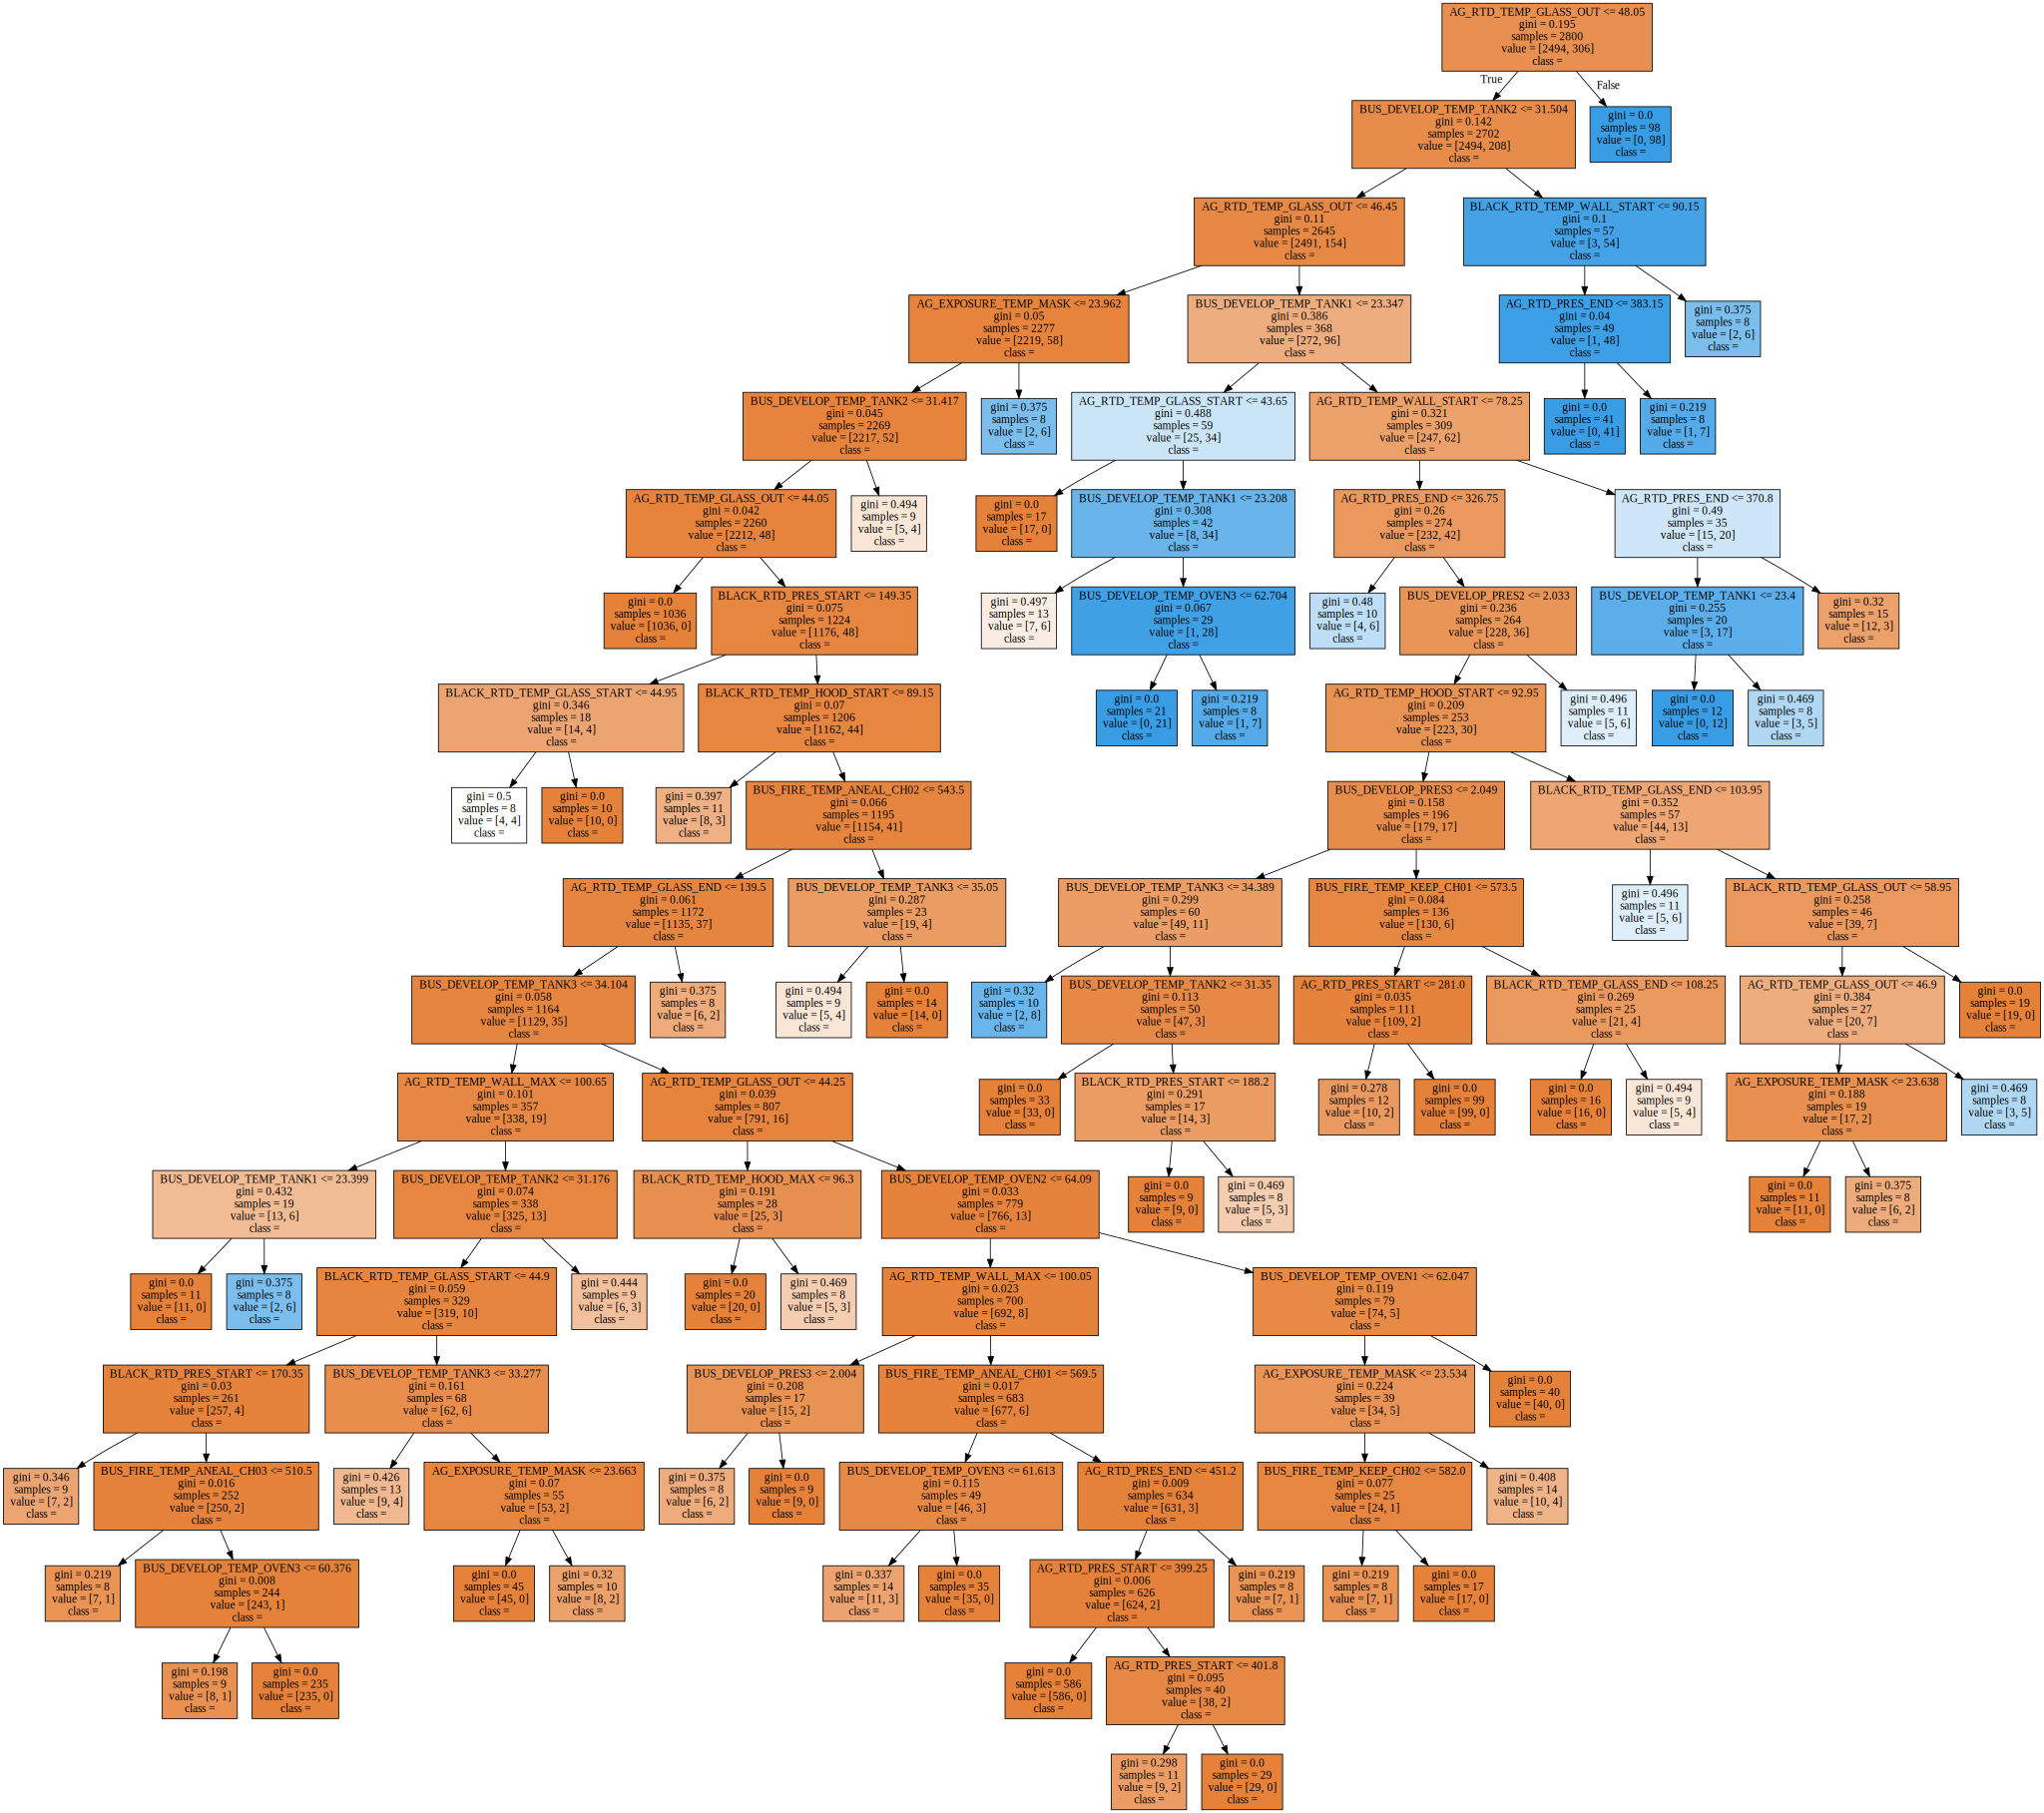

In [11]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='BUS_Process.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('BUS_process.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

### 유전체

In [12]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_PROCESS.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_PROCESS["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [13]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 11)
train data Y size:(2800,)
test data X size:(1200, 11)
test data Y size:(1200,)


In [14]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.947
Score on test set: 0.933
Confusion matrix: 
[[1076    3]
 [  77   44]]


In [16]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,DIELEC_FIRE_EXHAUST_HEAT5,0.321
6,DIELEC_FIRE_EXHAUST_HEAT3,0.205
10,DIELEC_FIRE_EXHAUST_HEAT7,0.121
7,DIELEC_FIRE_EXHAUST_HEAT4,0.096
5,DIELEC_FIRE_EXHAUST_HEAT2,0.059
2,DIELEC_FIRE_TEMP_ANEAL_CH02,0.046
4,DIELEC_FIRE_EXHAUST_HEAT1,0.039
9,DIELEC_FIRE_EXHAUST_HEAT6,0.038
0,DIELEC_FIRE_TEMP_KEEP_CH01,0.037
3,DIELEC_FIRE_TEMP_ANEAL_CH03,0.020


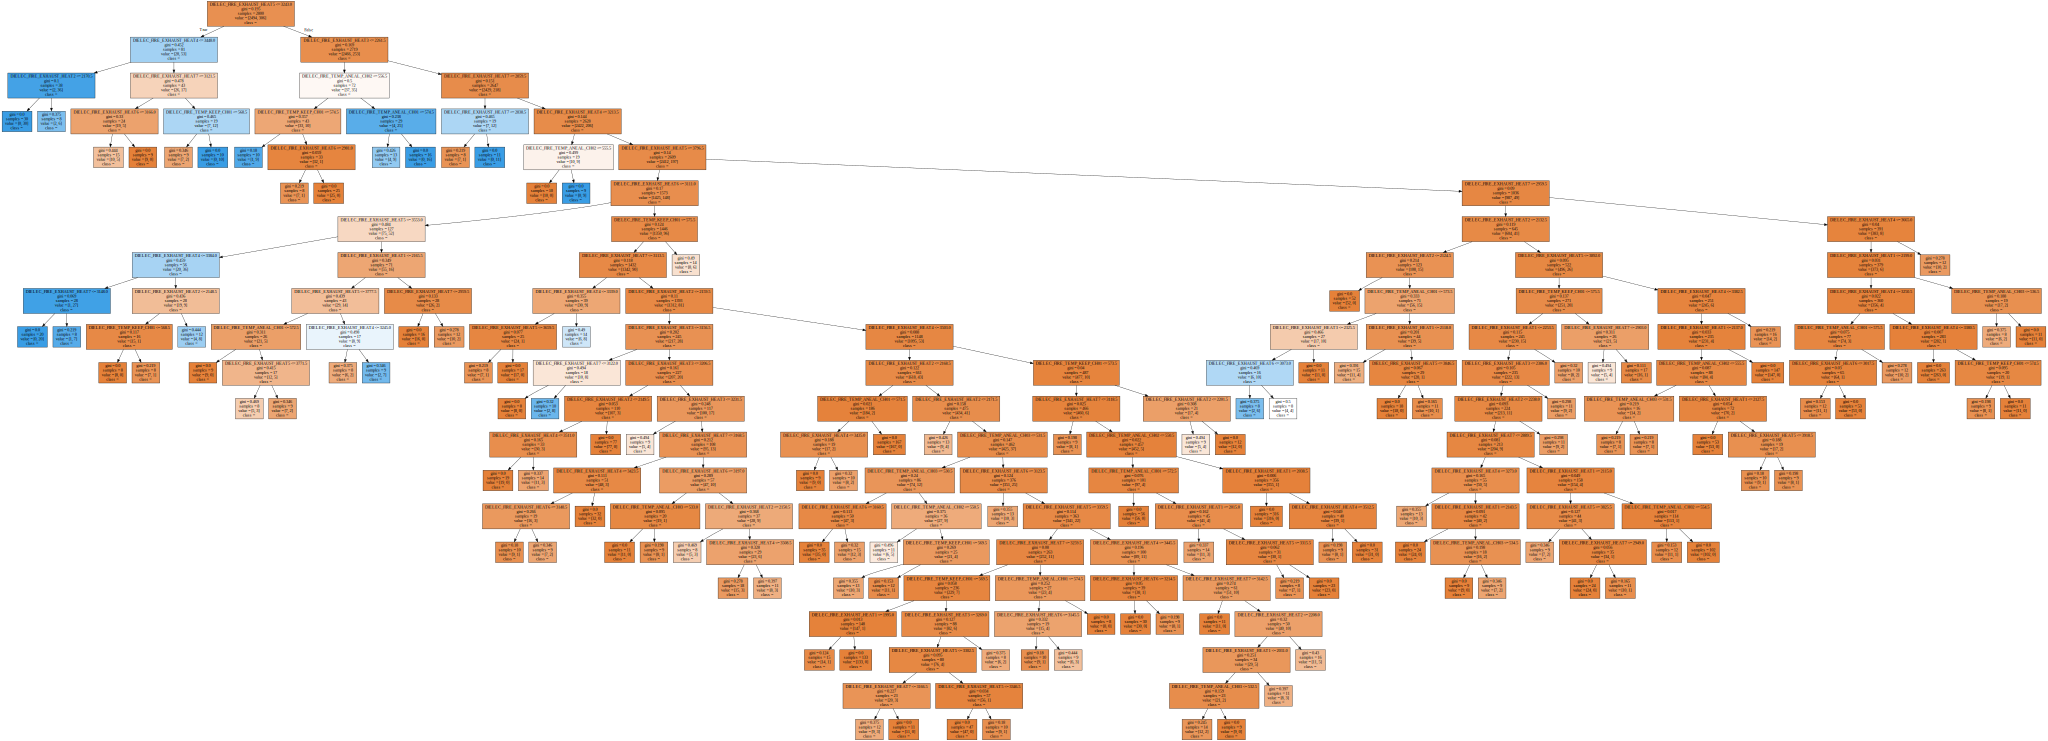

In [17]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='유전체_process.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('유전체_process.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

### 형광체

In [18]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_TAT.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_TAT["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [19]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 26)
train data Y size:(2800,)
test data X size:(1200, 26)
test data Y size:(1200,)


In [20]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.949
Score on test set: 0.929
Confusion matrix: 
[[1070    9]
 [  76   45]]


In [22]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
24,PHOS_FIRE_EXHAUST_HEAT3,0.211
3,PHOS_R_DRY_TEMP_WALL_MAX,0.201
8,PHOS_R_DRY_TEMP_HOOD_MAX,0.156
23,PHOS_FIRE_EXHAUST_HEAT2,0.069
22,PHOS_FIRE_EXHAUST_HEAT1,0.054
14,PHOS_G_DRY_PRES_END,0.043
7,PHOS_R_DRY_TEMP_HOOD_START,0.028
11,PHOS_G_DRY_TEMP_WALL_START,0.023
9,PHOS_G_DRY_TEMP_GLASS_START,0.023
21,PHOS_FIRE_TEMP_ANEAL_CH04,0.022


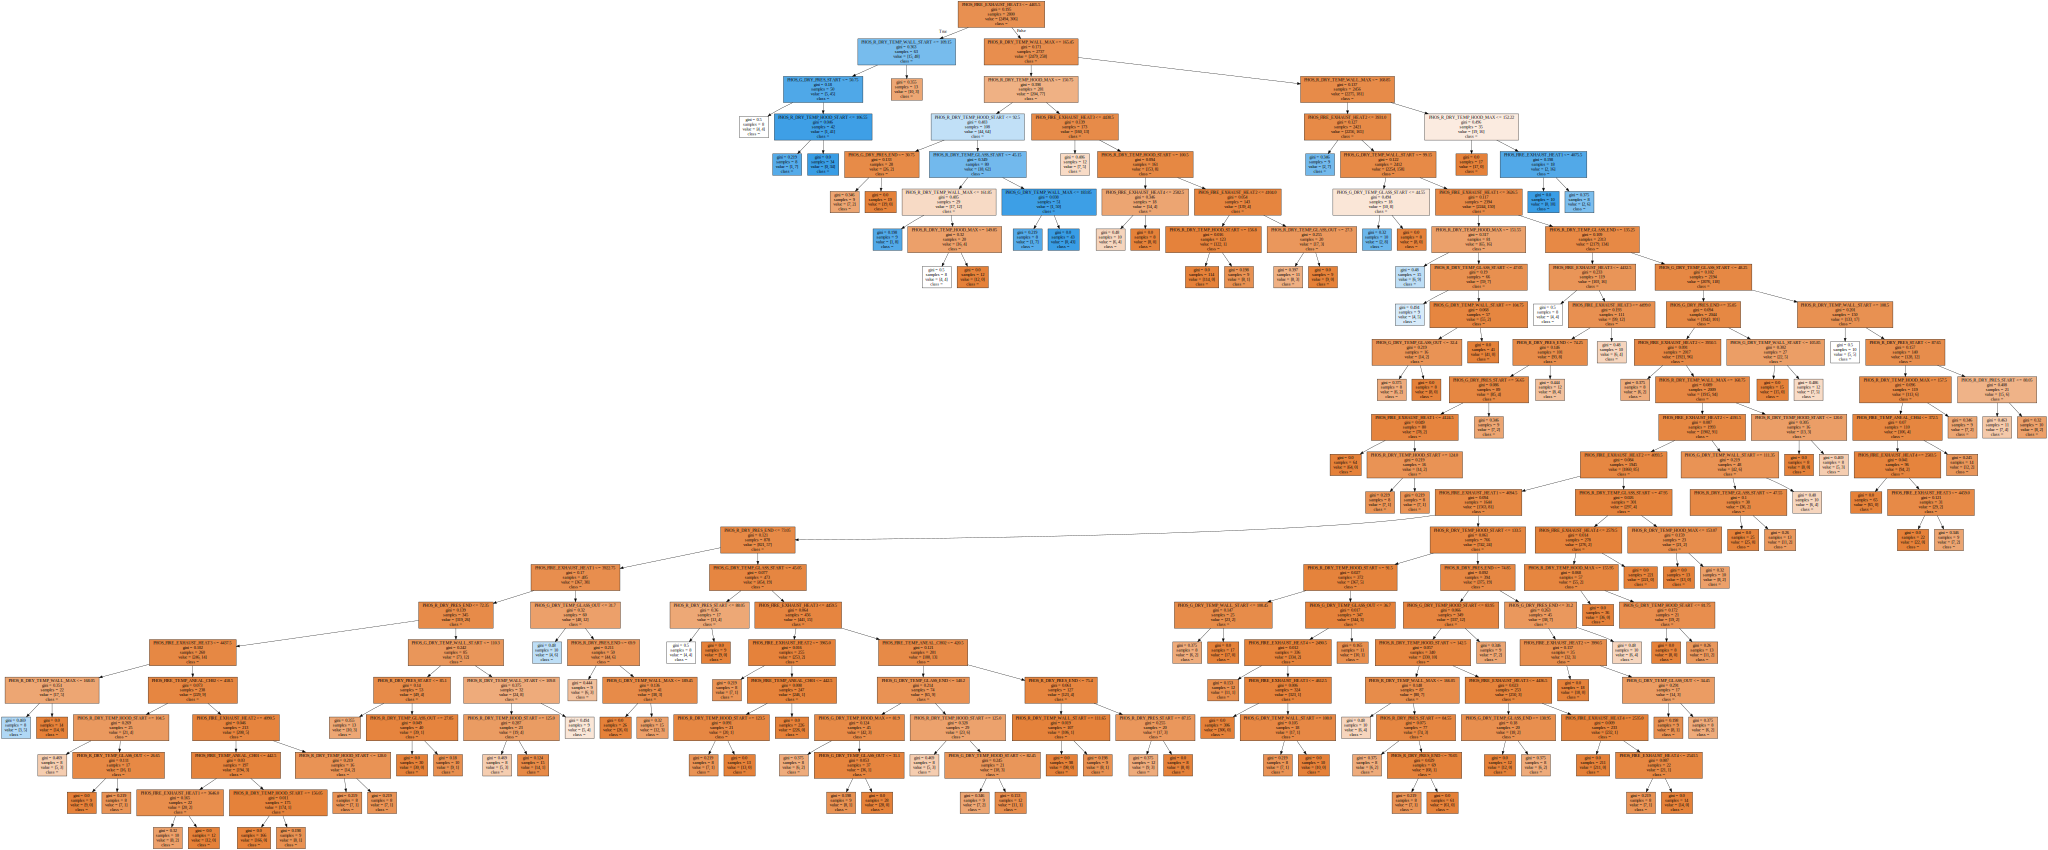

In [23]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='형광체_Process.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('형광체_process.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

# MACHINE

In [24]:
# 데이터 구성하기(MFG_MACHINE)
MFG_MACHINE = pd.read_csv("/Users/joylee/Documents/BUS_machine.csv", engine="python")
#MFG_MACHINE = MFG_MACHINE.drop(MFG_MACHINE.columns[0], axis=1)
MFG_MACHINE.head()

,JUDGE,MC_1BLACK_2RTD,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE
0,양품,2호기,1호기,2호기,1호기,1호기
1,양품,2호기,1호기,2호기,1호기,1호기
2,양품,2호기,1호기,2호기,1호기,1호기
3,양품,2호기,1호기,2호기,1호기,1호기
4,양품,2호기,1호기,2호기,1호기,1호기


In [25]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/Users/joylee/Documents/유전체_machine.csv", engine="python")
#MFG_PROCESS = MFG_PROCESS.drop(MFG_PROCESS.columns[0], axis=1)

In [26]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/Users/joylee/Documents/형광체_machine.csv", engine="python")
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)

### BUS

In [27]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_MACHINE.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_MACHINE["JUDGE"]
df_x_dummy = pd.get_dummies(df_raw_x)
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)
df_x_dummy.head()

,MC_1BLACK_2RTD_1호기,MC_1BLACK_2RTD_2호기,MC_2AG_2RTD_1호기,MC_2AG_2RTD_2호기,MC_2AG_3EXPOSURE_1호기,MC_2AG_3EXPOSURE_2호기,MC_3BUS_1DEVELOP_1호기,MC_3BUS_1DEVELOP_2호기,MC_3BUS_2FIRE_1호기,MC_3BUS_2FIRE_2호기
0,0,1,1,0,0,1,1,0,1,0
1,0,1,1,0,0,1,1,0,1,0
2,0,1,1,0,0,1,1,0,1,0
3,0,1,1,0,0,1,1,0,1,0
4,0,1,1,0,0,1,1,0,1,0


In [28]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 10)
train data Y size:(2800,)
test data X size:(1200, 10)
test data Y size:(1200,)


In [29]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.891
Score on test set: 0.899
Confusion matrix: 
[[1079    0]
 [ 121    0]]


In [31]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,MC_3BUS_1DEVELOP_1호기,0.164
0,MC_1BLACK_2RTD_1호기,0.155
9,MC_3BUS_2FIRE_2호기,0.123
7,MC_3BUS_1DEVELOP_2호기,0.107
4,MC_2AG_3EXPOSURE_1호기,0.104
8,MC_3BUS_2FIRE_1호기,0.096
2,MC_2AG_2RTD_1호기,0.079
1,MC_1BLACK_2RTD_2호기,0.076
5,MC_2AG_3EXPOSURE_2호기,0.072
3,MC_2AG_2RTD_2호기,0.024


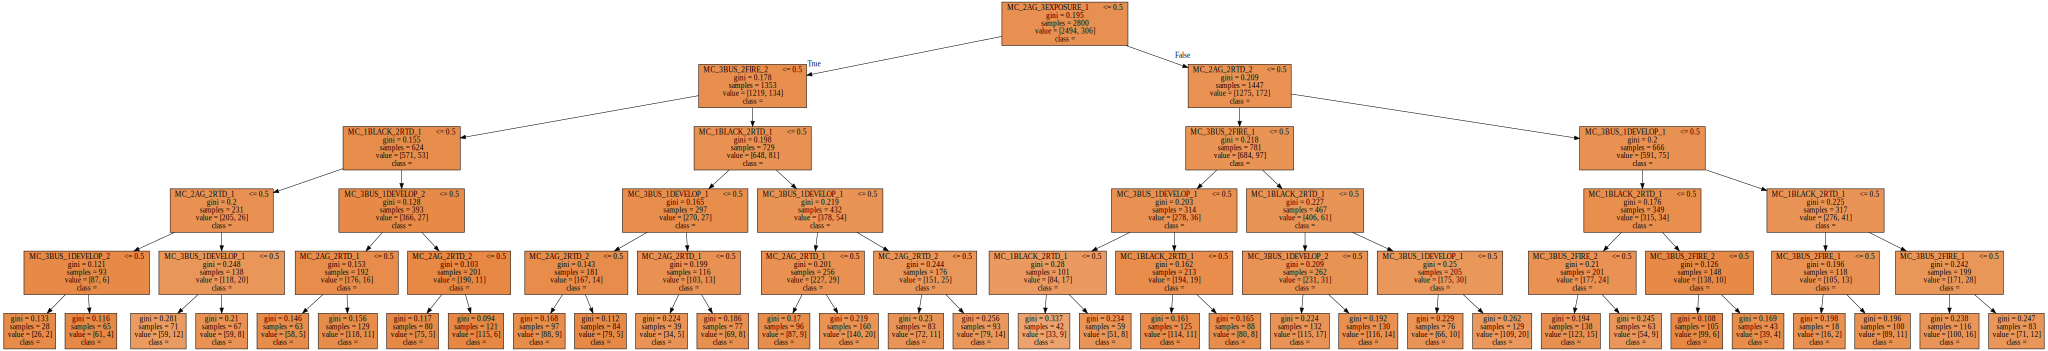

In [32]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='BUS_Machine.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('BUS_MACHINE.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

### 유전체

In [33]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_PROCESS.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_PROCESS["JUDGE"]
df_x_dummy = pd.get_dummies(df_raw_x)
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [34]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 3)
train data Y size:(2800,)
test data X size:(1200, 3)
test data Y size:(1200,)


In [35]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.891
Score on test set: 0.899
Confusion matrix: 
[[1079    0]
 [ 121    0]]


In [37]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,MC_4DIELEC_1FIRE_3호기,0.810
0,MC_4DIELEC_1FIRE_1호기,0.164
1,MC_4DIELEC_1FIRE_2호기,0.026


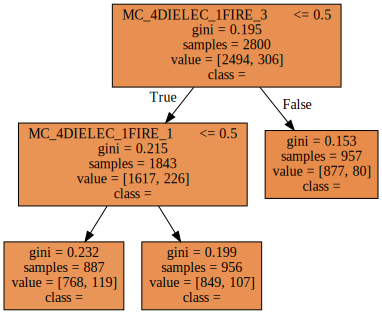

In [38]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='유전체_Machine.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('유전체_MACHINE.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

### 형광체

In [39]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_TAT.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_TAT["JUDGE"]
df_x_dummy = pd.get_dummies(df_raw_x)
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)
df_x_dummy.head()

,MC_6PHOS_1R_2DRY_1호기,MC_6PHOS_1R_2DRY_2호기,MC_6PHOS_2G_2DRY_1호기,MC_6PHOS_2G_2DRY_2호기,MC_6PHOS_4FIRE_1호기,MC_6PHOS_4FIRE_2호기,MC_6PHOS_4FIRE_3호기
0,0,1,0,1,0,0,1
1,0,1,0,1,0,0,1
2,0,1,0,1,0,0,1
3,0,1,0,1,0,0,1
4,0,1,0,1,0,0,1


In [40]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 7)
train data Y size:(2800,)
test data X size:(1200, 7)
test data Y size:(1200,)


In [41]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,MC_6PHOS_4FIRE_1호기,0.722
2,MC_6PHOS_2G_2DRY_1호기,0.091
6,MC_6PHOS_4FIRE_3호기,0.070
3,MC_6PHOS_2G_2DRY_2호기,0.041
0,MC_6PHOS_1R_2DRY_1호기,0.029
5,MC_6PHOS_4FIRE_2호기,0.027
1,MC_6PHOS_1R_2DRY_2호기,0.021


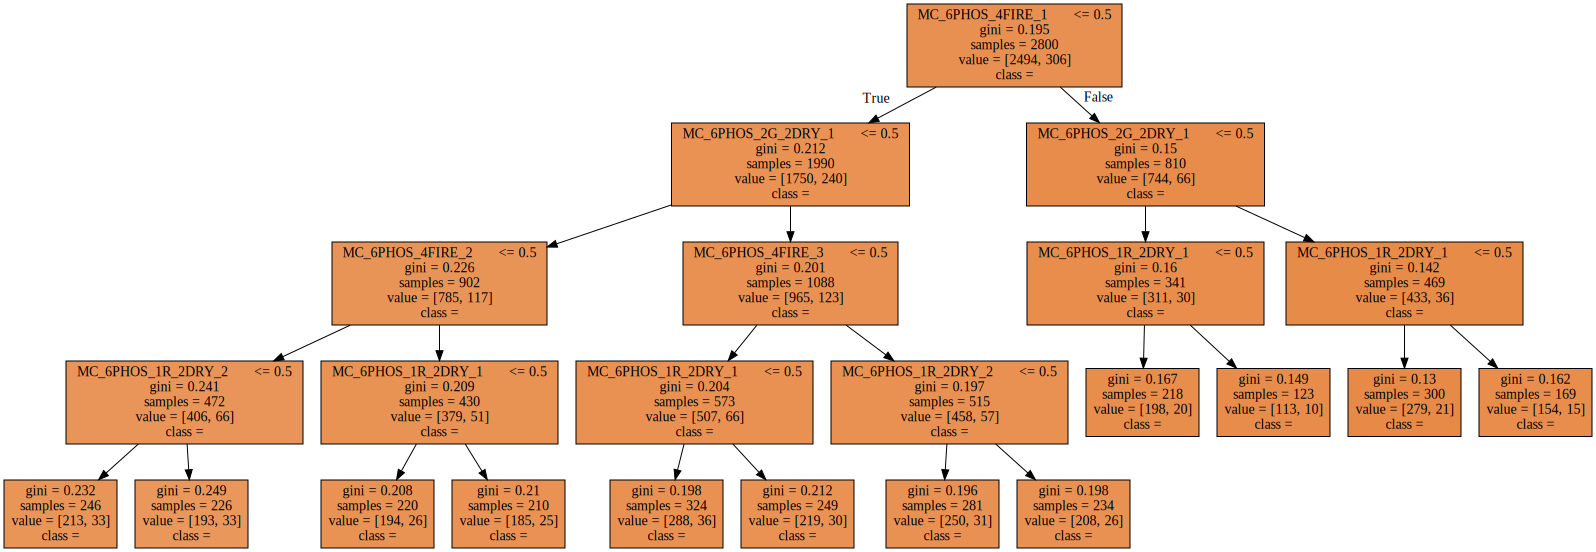

In [43]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='형광체_Machine.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('형광체_MACHINE.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

# TAT

In [44]:
# 데이터 구성하기(MFG_MACHINE)
MFG_MACHINE = pd.read_csv("/Users/joylee/Documents/BUS_tat.csv", engine="python")
#MFG_MACHINE = MFG_MACHINE.drop(MFG_MACHINE.columns[0], axis=1)
MFG_MACHINE.head()

,JUDGE,TAT_1BLACK_2RTD,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE
0,양품,220.0,74,160.0,416.0,6900.0
1,양품,210.0,71,150.0,372.0,6693.0
2,양품,220.0,69,148.0,368.0,6747.0
3,양품,210.0,69,178.0,416.0,7137.0
4,양품,210.0,69,132.0,380.0,7527.0


In [45]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/Users/joylee/Documents/유전체_tat.csv", engine="python")
#MFG_PROCESS = MFG_PROCESS.drop(MFG_PROCESS.columns[0], axis=1)

In [46]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/Users/joylee/Documents/형광제_tat.csv", engine="python")
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)

### BUS

In [47]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_MACHINE.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_MACHINE["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [48]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 5)
train data Y size:(2800,)
test data X size:(1200, 5)
test data Y size:(1200,)


In [49]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.910
Score on test set: 0.912
Confusion matrix: 
[[1076    3]
 [ 102   19]]


In [51]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,TAT_3BUS_2FIRE,0.409
3,TAT_3BUS_1DEVELOP,0.242
2,TAT_2AG_3EXPOSURE,0.187
0,TAT_1BLACK_2RTD,0.086
1,TAT_2AG_2RTD,0.075


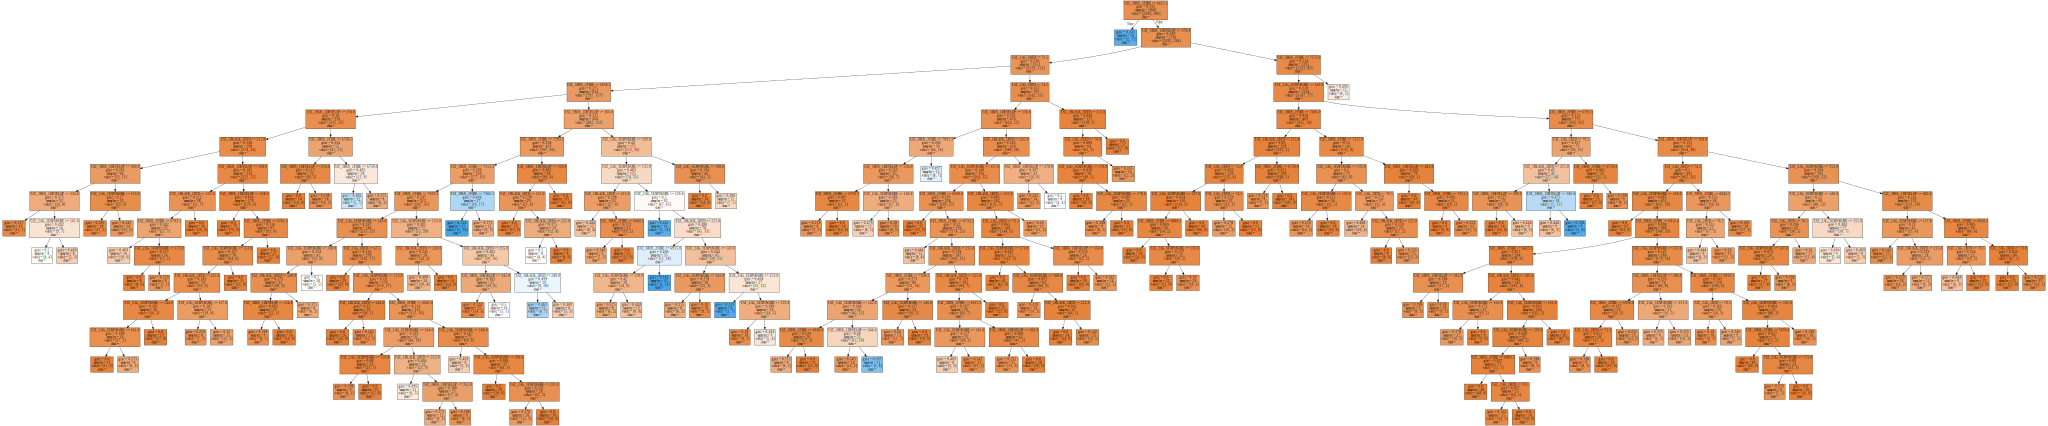

In [52]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='BUS_Tat.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('BUS_Tat.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

### 유전체

In [53]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_PROCESS.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_PROCESS["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [54]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 1)
train data Y size:(2800,)
test data X size:(1200, 1)
test data Y size:(1200,)


In [55]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.909
Score on test set: 0.922
Confusion matrix: 
[[1077    2]
 [  91   30]]


In [57]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
0,TAT_4DIELEC_FIRE,1.0


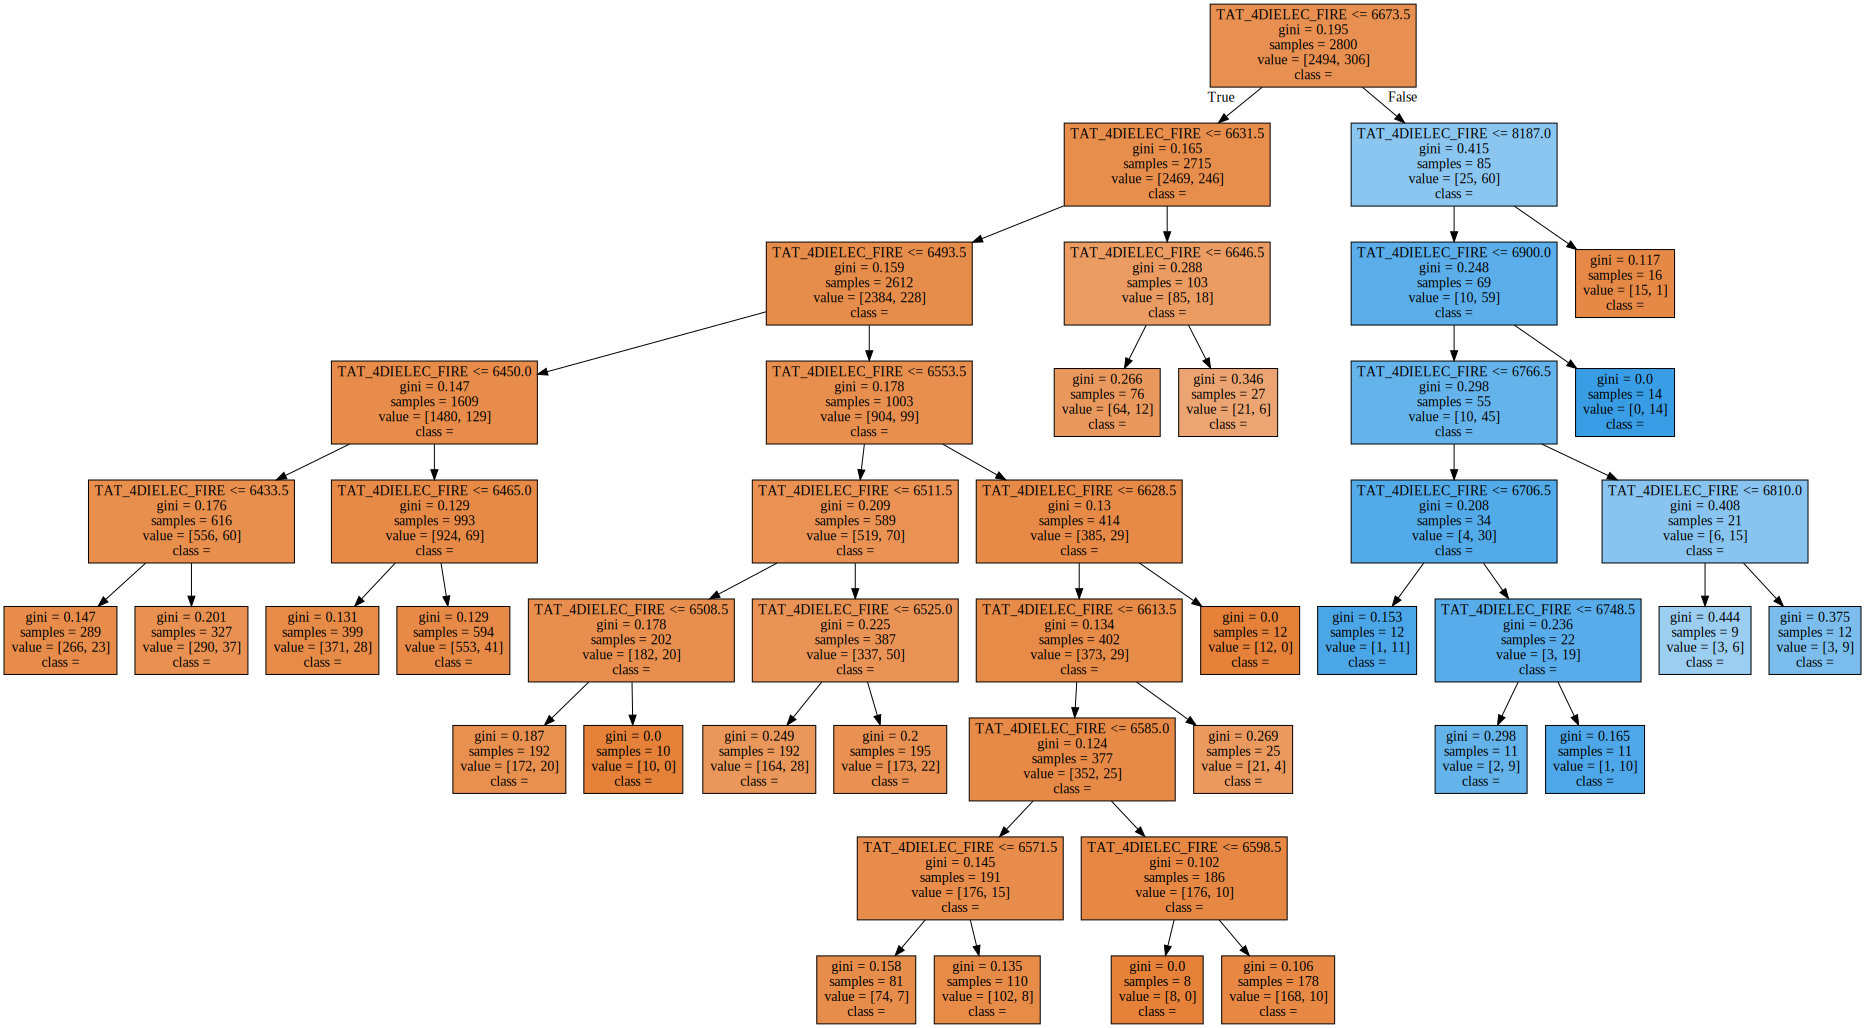

In [58]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='유전체_Tat.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('유전체_Tat.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

### 형광체

In [59]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_TAT.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = MFG_TAT["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [60]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2800, 3)
train data Y size:(2800,)
test data X size:(1200, 3)
test data Y size:(1200,)


In [61]:
gb_final = GradientBoostingClassifier()
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.904
Score on test set: 0.903
Confusion matrix: 
[[1078    1]
 [ 115    6]]


In [63]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,TAT_6PHOS_4FIRE,0.478
0,TAT_6PHOS_1R_2DRY,0.341
1,TAT_6PHOS_2G_2DRY,0.181


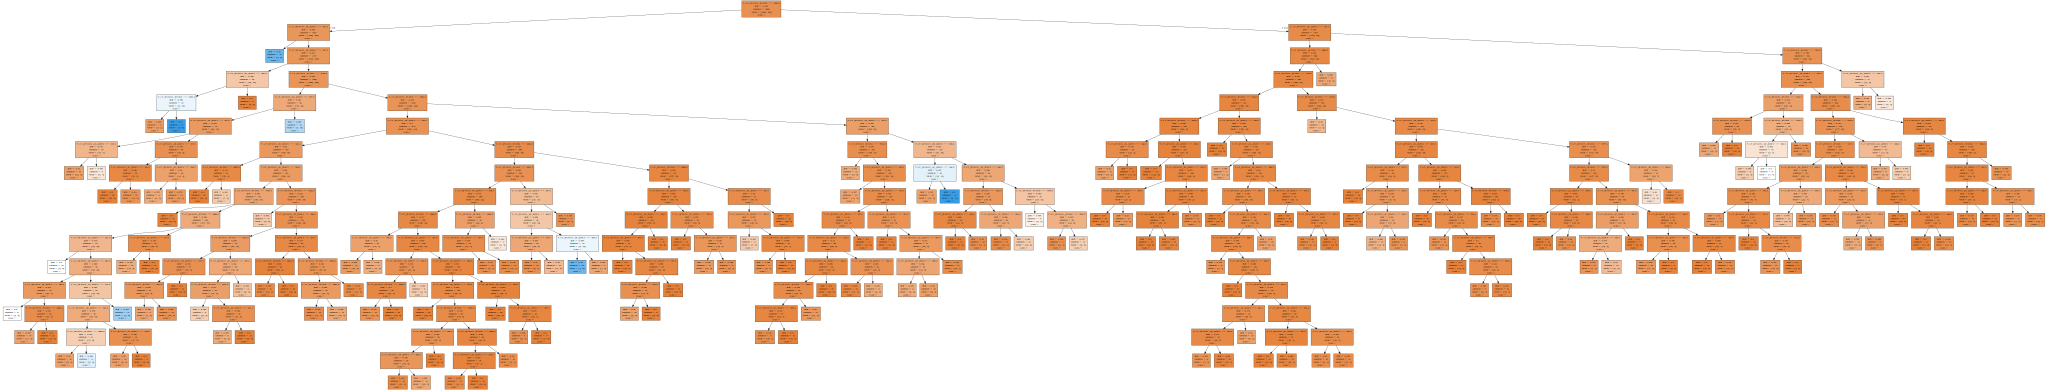

In [64]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='형광체_Tat.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('형광체_tat.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!